In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

626

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [7]:
# query_url

In [8]:
# set up lists to hold reponse info
lat = []
lon = []
temp = []
hum = []
wind = []
cloud = []
country = []
date = []
new_city = []

x = 0

for city in cities:
    try:
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        temp.append(response['main']['temp_max'])
        lon.append(response['coord']['lon'])
        hum.append(response['main']['humidity'])
        wind.append(response['wind']['speed'])
        cloud.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        new_city.append(city)        
        x = x + 1
        print(f"Retrieving info for city number {x}:{city}")
        print(f"The temperature information received is: {response['main']['temp']} °C")
        
    except:
        x = x + 1
        print(f"Info for city number {x}:{city} not found. Skipping...")
        pass

Retrieving info for city number 1:raha
The temperature information received is: 37.79 °C
Retrieving info for city number 2:atuona
The temperature information received is: 26.29 °C
Retrieving info for city number 3:busselton
The temperature information received is: 16.26 °C
Retrieving info for city number 4:atar
The temperature information received is: 24.7 °C
Retrieving info for city number 5:port macquarie
The temperature information received is: 20.89 °C
Retrieving info for city number 6:ushuaia
The temperature information received is: 4 °C
Retrieving info for city number 7:port elizabeth
The temperature information received is: 13 °C
Retrieving info for city number 8:hobyo
The temperature information received is: 29.35 °C
Retrieving info for city number 9:victoria
The temperature information received is: 24.43 °C
Retrieving info for city number 10:luderitz
The temperature information received is: 12.68 °C
Retrieving info for city number 11:rikitea
The temperature information receive

Retrieving info for city number 91:khatanga
The temperature information received is: 0.39 °C
Retrieving info for city number 92:banda aceh
The temperature information received is: 29.33 °C
Retrieving info for city number 93:mlonggo
The temperature information received is: 31 °C
Retrieving info for city number 94:clyde river
The temperature information received is: -5 °C
Retrieving info for city number 95:spirit river
The temperature information received is: 10 °C
Retrieving info for city number 96:malanje
The temperature information received is: 17.87 °C
Retrieving info for city number 97:kodiak
The temperature information received is: 7 °C
Retrieving info for city number 98:wonopringgo
The temperature information received is: 20 °C
Retrieving info for city number 99:cabo san lucas
The temperature information received is: 22.03 °C
Retrieving info for city number 100:bambous virieux
The temperature information received is: 25 °C
Retrieving info for city number 101:jamestown
The temperat

Retrieving info for city number 183:mar del plata
The temperature information received is: 15.49 °C
Retrieving info for city number 184:kerema
The temperature information received is: 27.63 °C
Retrieving info for city number 185:chegdomyn
The temperature information received is: 12.74 °C
Retrieving info for city number 186:arcata
The temperature information received is: 10.39 °C
Retrieving info for city number 187:port alberni
The temperature information received is: 12.29 °C
Retrieving info for city number 188:yulara
The temperature information received is: 25 °C
Retrieving info for city number 189:tamandare
The temperature information received is: 24.85 °C
Retrieving info for city number 190:priargunsk
The temperature information received is: 4.95 °C
Retrieving info for city number 191:jarinu
The temperature information received is: 16.72 °C
Retrieving info for city number 192:ilulissat
The temperature information received is: 1 °C
Retrieving info for city number 193:meulaboh
The tem

Retrieving info for city number 273:bairiki
The temperature information received is: 30 °C
Info for city number 274:vaitupu not found. Skipping...
Retrieving info for city number 275:yarada
The temperature information received is: 30.29 °C
Retrieving info for city number 276:hanstholm
The temperature information received is: 5 °C
Retrieving info for city number 277:kizema
The temperature information received is: 2.37 °C
Retrieving info for city number 278:tautira
The temperature information received is: 29 °C
Retrieving info for city number 279:shingu
The temperature information received is: 19 °C
Retrieving info for city number 280:yondo
The temperature information received is: 22.07 °C
Info for city number 281:nizhneyansk not found. Skipping...
Retrieving info for city number 282:badulla
The temperature information received is: 26.36 °C
Retrieving info for city number 283:srednekolymsk
The temperature information received is: -0.91 °C
Retrieving info for city number 284:baiyin
The te

Info for city number 363:louisbourg not found. Skipping...
Retrieving info for city number 364:claresholm
The temperature information received is: 16.17 °C
Retrieving info for city number 365:gazli
The temperature information received is: 21.16 °C
Retrieving info for city number 366:chau doc
The temperature information received is: 33.67 °C
Info for city number 367:sorvag not found. Skipping...
Retrieving info for city number 368:longyan
The temperature information received is: 28.81 °C
Retrieving info for city number 369:bengkulu
The temperature information received is: 28.25 °C
Retrieving info for city number 370:ust-nera
The temperature information received is: 2.88 °C
Retrieving info for city number 371:goianapolis
The temperature information received is: 21.02 °C
Retrieving info for city number 372:port hardy
The temperature information received is: 10.61 °C
Retrieving info for city number 373:mwense
The temperature information received is: 18.04 °C
Retrieving info for city number

Retrieving info for city number 453:bereda
The temperature information received is: 5.15 °C
Retrieving info for city number 454:porto novo
The temperature information received is: 27 °C
Retrieving info for city number 455:waipawa
The temperature information received is: 16.99 °C
Retrieving info for city number 456:larnaca
The temperature information received is: 18.85 °C
Retrieving info for city number 457:liepaja
The temperature information received is: 7 °C
Retrieving info for city number 458:anadyr
The temperature information received is: -3.19 °C
Retrieving info for city number 459:zandvoort
The temperature information received is: 7.2 °C
Retrieving info for city number 460:shelburne
The temperature information received is: 7.28 °C
Info for city number 461:formoso do araguaia not found. Skipping...
Retrieving info for city number 462:isangel
The temperature information received is: 27 °C
Retrieving info for city number 463:chapais
The temperature information received is: 8 °C
Retri

Info for city number 543:satitoa not found. Skipping...
Retrieving info for city number 544:maniitsoq
The temperature information received is: 1.64 °C
Retrieving info for city number 545:san carlos de bariloche
The temperature information received is: 12 °C
Retrieving info for city number 546:tunceli
The temperature information received is: 9 °C
Retrieving info for city number 547:guider
The temperature information received is: 28.68 °C
Retrieving info for city number 548:guayaramerin
The temperature information received is: 19.18 °C
Retrieving info for city number 549:joensuu
The temperature information received is: -1.35 °C
Retrieving info for city number 550:jesup
The temperature information received is: 21.86 °C
Retrieving info for city number 551:buta
The temperature information received is: 19.42 °C
Retrieving info for city number 552:ponta delgada
The temperature information received is: 13 °C
Info for city number 553:kamenskoye not found. Skipping...
Retrieving info for city nu

In [10]:
weather_dict = {
    "City": new_city,
    "Lat": lat,
    "Lon": lat,
    "Max Temp": temp,
    "Humidity": hum,
    "Cloudiness": cloud,
    "Wind Speed": wind,
    "Country": country,
    "Date": date

}


In [11]:
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,raha,26.2333,26.2333,37.79,21,51,1.48,IN,1619753539
1,atuona,-9.8000,-9.8000,26.29,70,9,2.36,PF,1619753540
2,busselton,-33.6500,-33.6500,16.67,70,40,0.89,AU,1619753540
3,atar,20.5169,20.5169,24.70,39,91,2.54,MR,1619753540
4,port macquarie,-31.4333,-31.4333,22.78,61,8,0.89,AU,1619753541


In [12]:
weather_data.to_csv(output_data_file, index=True)

In [13]:
weather_data.describe()

,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,5.760000e+02
mean,19.857263,19.857263,16.900747,70.185764,52.090278,3.257986,1.619754e+09
std,33.353723,33.353723,10.293661,21.665405,38.639545,2.127769,1.156619e+02
min,-54.800000,-54.800000,-12.220000,8.000000,0.000000,0.080000,1.619753e+09
25%,-8.800150,-8.800150,9.052500,59.750000,14.000000,1.690000,1.619754e+09
50%,25.313500,25.313500,18.035000,74.000000,52.500000,2.740000,1.619754e+09
75%,47.037175,47.037175,25.365000,87.000000,90.000000,4.380000,1.619754e+09
max,78.218600,78.218600,39.710000,100.000000,100.000000,13.380000,1.619754e+09


In [46]:
weather_data_clean = weather_data.loc[weather_data['Humidity'] < 100,:]
weather_data_clean

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,raha,26.2333,26.2333,37.79,21,51,1.48,IN,1619753539
1,atuona,-9.8000,-9.8000,26.29,70,9,2.36,PF,1619753540
2,busselton,-33.6500,-33.6500,16.67,70,40,0.89,AU,1619753540
3,atar,20.5169,20.5169,24.70,39,91,2.54,MR,1619753540
4,port macquarie,-31.4333,-31.4333,22.78,61,8,0.89,AU,1619753541
...,...,...,...,...,...,...,...,...,...
571,baker city,44.7749,44.7749,18.00,42,1,3.60,US,1619753626
572,mtinko,-4.5500,-4.5500,15.84,90,88,3.65,TZ,1619753800
573,jacksonville,30.3322,30.3322,26.00,57,75,2.57,US,1619753782
574,brigantine,39.4101,39.4101,23.33,73,90,2.57,US,1619753801


In [47]:
len(weather_data)


576

In [48]:
len(weather_data_clean)

558

In [49]:
#  Get the indices of cities that have humidity over 100%.

humidity_index = weather_data.loc[weather_data['Humidity'] >= 100,:]
humidity_index

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
74,vaini,-21.2000,-21.2000,24.00,100,90,5.66,TO,1619753420
86,khatanga,71.9667,71.9667,0.39,100,100,2.29,RU,1619753577
89,clyde river,70.4692,70.4692,-5.00,100,90,1.60,CA,1619753398
96,jamestown,42.0970,42.0970,8.33,100,90,5.66,US,1619753443
193,cumpana,44.1167,44.1167,8.00,100,90,3.09,RO,1619753626
194,cabedelo,-6.9811,-6.9811,23.00,100,40,2.06,BR,1619753627
205,peru,40.7537,40.7537,12.22,100,90,3.09,US,1619753631
260,cayenne,4.9333,4.9333,25.56,100,75,1.03,GF,1619753658
263,vilcun,-38.6500,-38.6500,11.00,100,75,1.54,CL,1619753660
313,melendugno,40.2747,40.2747,12.00,100,75,1.54,IT,1619753681


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [50]:
## Latitude vs. Temperature Plot 

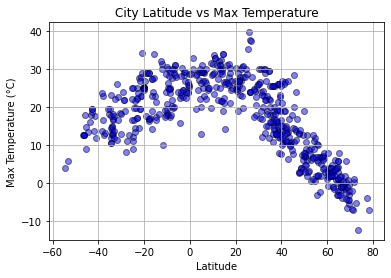

In [61]:
## Convert to floats and store Poverty Rate and Bank Count as x and y values
x_values = weather_data_clean['Lat'].astype('float')
y_values = weather_data_clean['Max Temp'].astype('float')

# Plot scatter plot
plt.scatter(x_values,y_values,  c='Blue', edgecolors="black",alpha=0.5 )

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°C)')
plt.title('City Latitude vs Max Temperature')
plt.grid()
# Show plot
plt.savefig("Images/Scatter_1_Lat_Temp.png")

plt.show()

## Latitude vs. Humidity Plot

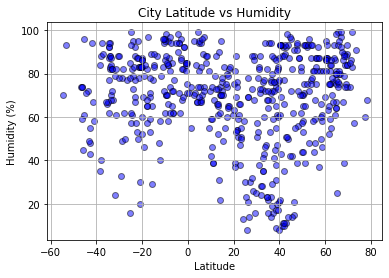

In [62]:
## Convert to floats and store Poverty Rate and Bank Count as x and y values
x_values = weather_data_clean['Lat'].astype('float')
y_values = weather_data_clean['Humidity'].astype('float')

# Plot scatter plot
plt.scatter(x_values,y_values,  c='Blue', edgecolors="black",alpha=0.5 )

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs Humidity')
plt.grid()
# Show plot
plt.savefig("Images/Scatter_2_Lat_Humidity.png")

plt.show()

## Latitude vs. Cloudiness Plot

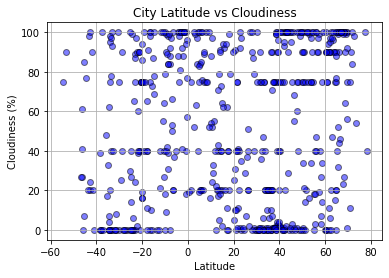

In [63]:
## Convert to floats and store Poverty Rate and Bank Count as x and y values
x_values = weather_data_clean['Lat'].astype('float')
y_values = weather_data_clean['Cloudiness'].astype('float')

# Plot scatter plot
plt.scatter(x_values,y_values,  c='Blue', edgecolors="black",alpha=0.5 )

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs Cloudiness')
plt.grid()
plt.savefig("Images/Scatter_3_Lat_Cloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

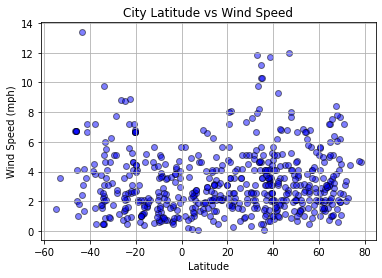

In [64]:
## Convert to floats and store Poverty Rate and Bank Count as x and y values
x_values = weather_data_clean['Lat'].astype('float')
y_values = weather_data_clean['Wind Speed'].astype('float')

# Plot scatter plot
plt.scatter(x_values,y_values,  c='Blue', edgecolors="black",alpha=0.5 )

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('City Latitude vs Wind Speed')
plt.grid()
plt.savefig("Images/Scatter_4_Lat_WindSpeed.png")
plt.show()

## Linear Regression

In [65]:

Northern_hemis = weather_data.loc[weather_data['Lat'] >= 0,:]
Northern_hemis

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,raha,26.2333,26.2333,37.79,21,51,1.48,IN,1619753539
3,atar,20.5169,20.5169,24.70,39,91,2.54,MR,1619753540
7,hobyo,5.3505,5.3505,29.35,67,84,2.65,SO,1619753542
8,victoria,22.2855,22.2855,27.00,61,20,2.57,HK,1619753401
12,longyearbyen,78.2186,78.2186,-7.00,68,40,4.63,SJ,1619753381
...,...,...,...,...,...,...,...,...,...
567,tura,25.5198,25.5198,35.28,23,7,2.88,IN,1619753797
571,baker city,44.7749,44.7749,18.00,42,1,3.60,US,1619753626
573,jacksonville,30.3322,30.3322,26.00,57,75,2.57,US,1619753782
574,brigantine,39.4101,39.4101,23.33,73,90,2.57,US,1619753801


In [28]:

Southern_hemis = weather_data.loc[weather_data['Lat'] < 0,:]
Southern_hemis

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,atuona,-9.8000,-9.8000,26.29,70,9,2.36,PF,1619753540
2,busselton,-33.6500,-33.6500,16.67,70,40,0.89,AU,1619753540
4,port macquarie,-31.4333,-31.4333,22.78,61,8,0.89,AU,1619753541
5,ushuaia,-54.8000,-54.8000,4.00,70,75,1.50,AR,1619753267
6,port elizabeth,-33.9180,-33.9180,13.00,88,0,3.09,ZA,1619753542
...,...,...,...,...,...,...,...,...,...
560,cassilandia,-19.1133,-19.1133,17.80,46,100,1.98,BR,1619753794
568,karasburg,-28.0167,-28.0167,8.18,62,0,2.74,NA,1619753798
569,gamboma,-1.8764,-1.8764,22.37,92,100,1.43,CG,1619753799
570,charters towers,-20.1000,-20.1000,24.59,52,94,3.99,AU,1619753799


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

R squared: 0.7853482980178853


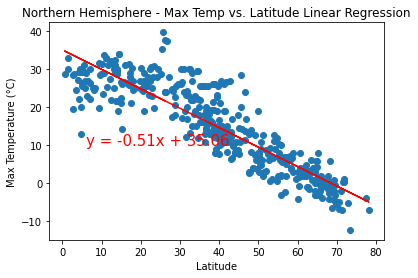

In [29]:
## Convert to floats and store Poverty Rate and Bank Count as x and y values
x_values = Northern_hemis['Lat'].astype('float')
y_values = Northern_hemis['Max Temp'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°C)')


plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

In [30]:
plt.savefig("/Images/Fig_1_North_Temp_regression.png")


FileNotFoundError: [Errno 2] No such file or directory: '/Images/Fig_1_North_Temp_regression.png'

<Figure size 432x288 with 0 Axes>

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

R squared: 0.403880546957865


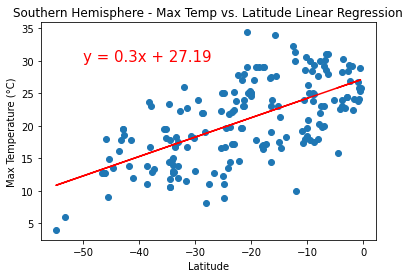

In [31]:
## Convert to floats and store Poverty Rate and Bank Count as x and y values
x_values = Southern_hemis['Lat'].astype('float')
y_values = Southern_hemis['Max Temp'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,30),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°C)')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

In [32]:
plt.savefig("/Images/Fig_2_South_Temp_regression.png")


FileNotFoundError: [Errno 2] No such file or directory: '/Images/Fig_2_South_Temp_regression.png'

<Figure size 432x288 with 0 Axes>

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R squared: 0.028167062597580065


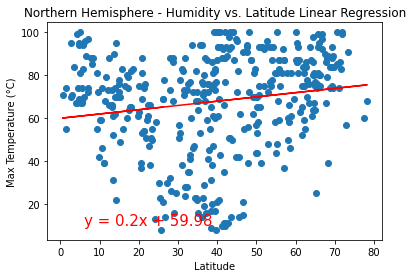

In [33]:
## Convert to floats and store Poverty Rate and Bank Count as x and y values
x_values = Northern_hemis['Lat'].astype('float')
y_values = Northern_hemis['Humidity'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°C)')


plt.title('Northern Hemisphere - Humidity vs. Latitude Linear Regression')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

In [34]:
plt.savefig("/Images/Fig_3_North_Humidity_regression.png")


FileNotFoundError: [Errno 2] No such file or directory: '/Images/Fig_3_North_Humidity_regression.png'

<Figure size 432x288 with 0 Axes>

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R squared: 0.03839193447280244


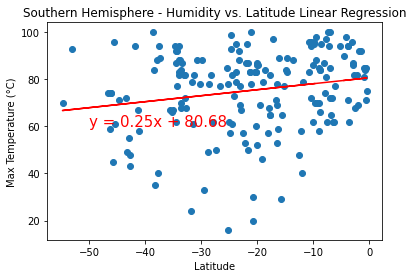

In [35]:
## Convert to floats and store Poverty Rate and Bank Count as x and y values
x_values = Southern_hemis['Lat'].astype('float')
y_values = Southern_hemis['Humidity'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,60),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°C)')
plt.title('Southern Hemisphere - Humidity vs. Latitude Linear Regression')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

In [36]:
plt.savefig("/Images/Fig_4_South_Humidity_regression.png")


FileNotFoundError: [Errno 2] No such file or directory: '/Images/Fig_4_South_Humidity_regression.png'

<Figure size 432x288 with 0 Axes>

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R squared: 0.02871316979771653


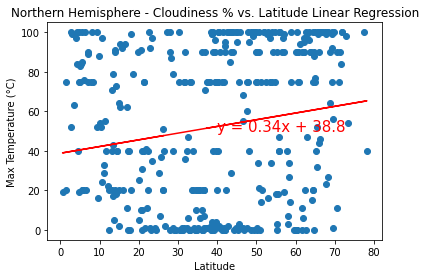

In [37]:
## Convert to floats and store Poverty Rate and Bank Count as x and y values
x_values = Northern_hemis['Lat'].astype('float')
y_values = Northern_hemis['Cloudiness'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,50),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°C)')


plt.title('Northern Hemisphere - Cloudiness % vs. Latitude Linear Regression')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

In [38]:
plt.savefig("/Images/Fig_5_North_Cloudiness_regression.png")


FileNotFoundError: [Errno 2] No such file or directory: '/Images/Fig_5_North_Cloudiness_regression.png'

<Figure size 432x288 with 0 Axes>

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R squared: 0.08778403056286666


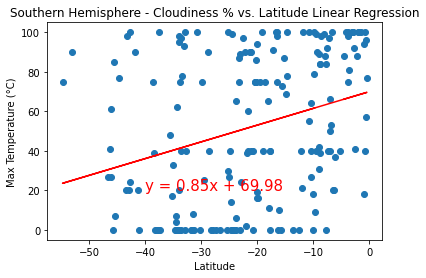

In [39]:
## Convert to floats and store Poverty Rate and Bank Count as x and y values
x_values = Southern_hemis['Lat'].astype('float')
y_values = Southern_hemis['Cloudiness'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,20),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°C)')
plt.title('Southern Hemisphere - Cloudiness % vs. Latitude Linear Regression')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

In [40]:
plt.savefig("/Images/Fig_6_South_Cloudiness_regression.png")


FileNotFoundError: [Errno 2] No such file or directory: '/Images/Fig_6_South_Cloudiness_regression.png'

<Figure size 432x288 with 0 Axes>

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R squared: 0.01160645113078658


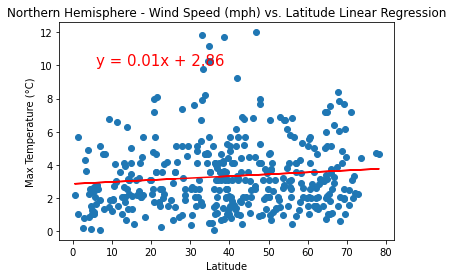

In [41]:
## Convert to floats and store Poverty Rate and Bank Count as x and y values
x_values = Northern_hemis['Lat'].astype('float')
y_values = Northern_hemis['Wind Speed'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°C)')


plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

In [42]:
plt.savefig("/Images/Fig_7_North_Wind Speed_regression.png")


FileNotFoundError: [Errno 2] No such file or directory: '/Images/Fig_7_North_Wind Speed_regression.png'

<Figure size 432x288 with 0 Axes>

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R squared: 0.05899934728384938


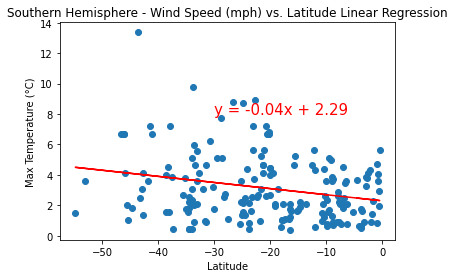

In [45]:
## Convert to floats and store Poverty Rate and Bank Count as x and y values
x_values = Southern_hemis['Lat'].astype('float')
y_values = Southern_hemis['Wind Speed'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,8),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°C)')
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

In [44]:
plt.savefig("/Images/Fig_8_South_Wind Speed_regression.png")


FileNotFoundError: [Errno 2] No such file or directory: '/Images/Fig_8_South_Wind Speed_regression.png'

<Figure size 432x288 with 0 Axes>

In [ ]:
"What's the weather like as we approach the equator?"